In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import h5py as h5
from statsmodels.tsa.arima_model import ARIMA
import time
from joblib import Parallel, delayed

/home/hyf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f1 = h5.File('../data/processed/internet_t10_s3030_4070.h5','r')
data = f1['data'].value
data = np.squeeze(data)
data = np.reshape(data,(8928,900))
data = data.T
demo = pd.Series(data[0])

#### 自相关系数可以看出，基本整个序列是在时延为1000+的相关性较大，也即与近一周的相关性比较大

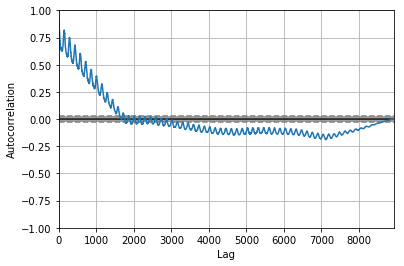

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(demo)

In [4]:
series = demo

fit time:2.0578644275665283s
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 8927
Model:                ARIMA(10, 1, 0)   Log Likelihood              -33628.872
Method:                       css-mle   S.D. of innovations             10.466
Date:                Sun, 13 Jan 2019   AIC                          67281.743
Time:                        14:14:33   BIC                          67366.905
Sample:                             1   HQIC                         67310.733
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.038     -0.154      0.877      -0.080       0.068
ar.L1.D.y     -0.5292      0.011    -50.011      0.000      -0.550      -0.508
ar.L2.D.y     -0.4637  

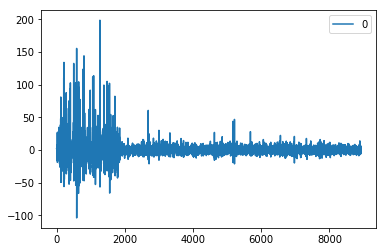

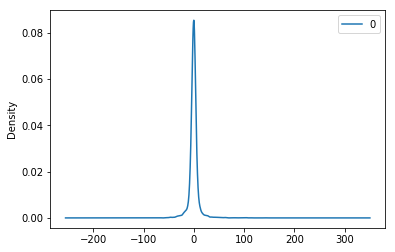

In [5]:
model = ARIMA(series, order = (10,1,0))
t1 = time.time()
model_fit = model.fit(disp = 0)
print('fit time:{}s'.format(time.time() - t1))
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

In [6]:
series.shape

(8928,)

predicted = 30.979550, expected = 31.853619, time = 0.312545
predicted = 31.579125, expected = 33.155847, time = 0.593771
predicted = 30.963416, expected = 23.552189, time = 0.887650
predicted = 28.993260, expected = 25.969727, time = 1.179214
predicted = 28.069487, expected = 32.042343, time = 1.457482
predicted = 28.729596, expected = 23.783299, time = 1.765512
predicted = 26.790017, expected = 25.839600, time = 2.028527
predicted = 27.901564, expected = 37.651988, time = 2.321036
predicted = 30.775626, expected = 30.080521, time = 2.589425
predicted = 29.261109, expected = 37.238246, time = 2.866815
predicted = 34.922932, expected = 42.783614, time = 3.153420
predicted = 35.493845, expected = 30.413365, time = 3.461088
predicted = 32.649455, expected = 31.693702, time = 3.730820
predicted = 34.712449, expected = 44.650545, time = 4.008250
predicted = 37.875483, expected = 25.528002, time = 4.265837
predicted = 31.371601, expected = 28.792697, time = 4.532010
predicted = 34.122126, e

predicted = 28.003025, expected = 27.113433, time = 39.509900
predicted = 27.024803, expected = 31.887769, time = 39.824245
predicted = 29.219466, expected = 34.321855, time = 40.112980
predicted = 31.556160, expected = 36.341861, time = 40.406358
predicted = 33.038405, expected = 40.082123, time = 40.686079
predicted = 35.450878, expected = 31.875921, time = 40.972116
predicted = 32.722553, expected = 26.910717, time = 41.285792
predicted = 31.401600, expected = 33.344571, time = 41.588641
predicted = 32.916954, expected = 29.255667, time = 41.878886
predicted = 30.957668, expected = 32.780617, time = 42.168349
predicted = 33.638370, expected = 36.305567, time = 42.429349
predicted = 33.137874, expected = 26.744295, time = 42.697649
predicted = 29.272303, expected = 30.971225, time = 43.011607
predicted = 31.994568, expected = 34.271157, time = 43.293953
predicted = 31.542026, expected = 28.922824, time = 43.592980
predicted = 30.892030, expected = 27.279854, time = 43.967968
predicte

predicted = 26.608096, expected = 27.779119, time = 77.356914
predicted = 26.273897, expected = 30.602088, time = 77.632855
predicted = 29.217152, expected = 28.922824, time = 77.918173
predicted = 27.864989, expected = 30.825300, time = 78.174151
predicted = 29.643741, expected = 27.779119, time = 78.446774
predicted = 28.759279, expected = 33.141855, time = 78.725927
predicted = 31.212431, expected = 23.718610, time = 79.010947
predicted = 26.736617, expected = 22.574905, time = 79.279956
predicted = 26.481839, expected = 26.683555, time = 79.592926
predicted = 26.439618, expected = 30.963326, time = 79.920158
predicted = 28.507716, expected = 29.921353, time = 80.221250
predicted = 29.307575, expected = 32.245058, time = 80.501947
predicted = 29.750627, expected = 28.481099, time = 80.792375
predicted = 28.035546, expected = 30.066530, time = 81.077041
predicted = 29.947213, expected = 32.541607, time = 81.359215
predicted = 31.036888, expected = 30.804804, time = 81.642218
predicte

predicted = 28.084924, expected = 30.435667, time = 114.878806
predicted = 29.825036, expected = 29.900108, time = 115.145599
predicted = 29.808929, expected = 32.650490, time = 115.402194
predicted = 29.967321, expected = 26.375158, time = 115.737718
predicted = 28.669083, expected = 26.208737, time = 116.018809
predicted = 29.073656, expected = 29.725788, time = 116.288854
predicted = 28.848642, expected = 22.444777, time = 116.584684
predicted = 25.693218, expected = 29.508669, time = 116.889525
predicted = 29.236502, expected = 32.128923, time = 117.180789
predicted = 28.524985, expected = 23.081319, time = 117.454270
predicted = 26.106157, expected = 30.463650, time = 117.728428
predicted = 29.521924, expected = 31.340363, time = 118.004716
predicted = 28.005475, expected = 23.588483, time = 118.285505
predicted = 27.177045, expected = 33.974608, time = 118.561214
predicted = 31.498631, expected = 32.867197, time = 118.836806
predicted = 29.286875, expected = 22.683787, time = 119

predicted = 17.302414, expected = 20.468964, time = 152.342897
predicted = 17.084790, expected = 15.872897, time = 152.627944
predicted = 16.762780, expected = 15.872897, time = 152.920391
predicted = 17.205427, expected = 23.052924, time = 153.196884
predicted = 19.052915, expected = 11.609673, time = 153.483769
predicted = 14.978545, expected = 22.611199, time = 153.760173
predicted = 21.012382, expected = 23.791198, time = 154.038413
predicted = 19.266839, expected = 9.930409, time = 154.325843
predicted = 15.586009, expected = 17.515867, time = 154.614921
predicted = 18.666930, expected = 25.803306, time = 154.903831
predicted = 19.332910, expected = 18.268133, time = 155.184652
predicted = 19.743440, expected = 23.052924, time = 155.457742
predicted = 22.392420, expected = 29.291961, time = 155.737538
predicted = 22.588616, expected = 26.302570, time = 156.001961
predicted = 24.437138, expected = 28.018128, time = 156.279329
predicted = 27.078694, expected = 30.602088, time = 156.

predicted = 15.935442, expected = 16.611171, time = 188.626011
predicted = 16.945085, expected = 17.349445, time = 188.917025
predicted = 16.139130, expected = 10.704977, time = 189.184759
predicted = 14.155750, expected = 15.134623, time = 189.466589
predicted = 15.227226, expected = 19.195131, time = 189.752360
predicted = 15.934889, expected = 13.288937, time = 190.019045
predicted = 14.936822, expected = 16.205740, time = 190.294372
predicted = 16.377159, expected = 20.302543, time = 190.587664
predicted = 16.598768, expected = 9.966703, time = 190.871934
predicted = 13.562946, expected = 16.611171, time = 191.160772
predicted = 17.029270, expected = 20.099827, time = 191.448029
predicted = 16.289776, expected = 12.145231, time = 191.718199
predicted = 15.901848, expected = 16.039318, time = 315.569738
predicted = 14.942800, expected = 11.609673, time = 315.858371
predicted = 13.668237, expected = 15.503760, time = 316.160038
predicted = 15.652760, expected = 18.789700, time = 316.

predicted = 20.011124, expected = 18.087720, time = 351.804236
predicted = 20.483422, expected = 26.375158, time = 352.113893
predicted = 22.685958, expected = 18.339664, time = 352.398800
predicted = 19.808073, expected = 22.647493, time = 352.686251
predicted = 23.048690, expected = 22.444777, time = 353.012532
predicted = 20.589639, expected = 18.911928, time = 353.324434
predicted = 20.404958, expected = 25.969727, time = 353.611197
predicted = 24.154180, expected = 27.771220, time = 353.915411
predicted = 23.855299, expected = 21.170944, time = 354.239080
predicted = 23.042528, expected = 20.294644, time = 354.553714
predicted = 22.195691, expected = 23.183052, time = 354.861151
predicted = 22.031145, expected = 19.086249, time = 355.182722
predicted = 21.350538, expected = 20.229954, time = 355.519556
predicted = 22.013135, expected = 21.134650, time = 355.835524
predicted = 20.538629, expected = 17.645994, time = 356.156021
predicted = 19.276122, expected = 20.432670, time = 356

predicted = 25.055813, expected = 26.598370, time = 392.780357
predicted = 25.439594, expected = 22.111934, time = 393.064614
predicted = 24.318014, expected = 29.052952, time = 393.351052
predicted = 27.045198, expected = 28.184550, time = 393.624542
predicted = 25.528297, expected = 21.540081, time = 393.919457
predicted = 24.459765, expected = 28.184550, time = 394.233733
predicted = 26.965165, expected = 19.158837, time = 394.567316
predicted = 21.510982, expected = 21.170944, time = 394.868079
predicted = 24.281026, expected = 23.183052, time = 395.151978
predicted = 22.771582, expected = 18.420563, time = 395.442701
predicted = 20.572893, expected = 17.718583, time = 395.729007
predicted = 20.679228, expected = 20.468964, time = 396.019857
predicted = 19.629330, expected = 19.730690, time = 396.334589
predicted = 19.812134, expected = 17.146730, time = 396.643943
predicted = 19.089551, expected = 25.803306, time = 396.941461
predicted = 22.067180, expected = 22.517365, time = 397

/home/hyf/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 20.687877, expected = 18.919827, time = 398.074968
predicted = 20.997665, expected = 21.207238, time = 398.385422
predicted = 20.758378, expected = 17.544262, time = 398.661947
predicted = 18.635491, expected = 16.777593, time = 398.946215
predicted = 19.611615, expected = 19.933405, time = 399.216801
predicted = 19.474460, expected = 17.515867, time = 399.534478
predicted = 18.012064, expected = 15.670181, time = 399.832028
predicted = 17.726750, expected = 15.872897, time = 400.166519
predicted = 16.512266, expected = 15.872897, time = 400.451174
predicted = 16.243524, expected = 11.812388, time = 400.746276
predicted = 14.666787, expected = 17.349445, time = 401.029209
predicted = 16.491389, expected = 18.051426, time = 401.311558
predicted = 16.088738, expected = 17.349445, time = 401.606389
predicted = 17.068537, expected = 20.468964, time = 401.945374
predicted = 18.343297, expected = 14.931907, time = 402.247622
predicted = 15.549157, expected = 16.980308, time = 402

predicted = 19.009281, expected = 17.645994, time = 439.079331
predicted = 19.266134, expected = 23.552189, time = 439.353170
predicted = 20.876605, expected = 16.574877, time = 439.746983
predicted = 18.325766, expected = 18.384269, time = 440.058061
predicted = 19.629300, expected = 20.027239, time = 440.383129
predicted = 18.431172, expected = 18.456857, time = 440.706846
predicted = 18.799507, expected = 17.313151, time = 441.014648
predicted = 18.895065, expected = 20.063533, time = 441.311251
predicted = 18.816402, expected = 15.872897, time = 441.619608
predicted = 17.180687, expected = 16.944014, time = 441.945676
predicted = 18.120247, expected = 21.540081, time = 442.356872
predicted = 19.141682, expected = 24.826022, time = 442.665632
predicted = 21.340820, expected = 20.468964, time = 442.998732
predicted = 20.636010, expected = 22.314650, time = 443.291631
predicted = 21.313458, expected = 21.004523, time = 443.582581
predicted = 20.363664, expected = 17.682289, time = 443

predicted = 29.824481, expected = 28.184550, time = 480.029862
predicted = 28.300889, expected = 24.529473, time = 480.341675
predicted = 27.445334, expected = 31.340363, time = 480.668695
predicted = 28.645007, expected = 27.699277, time = 480.991015
predicted = 27.261216, expected = 25.600590, time = 481.276677
predicted = 28.319539, expected = 33.019627, time = 481.596352
predicted = 29.898554, expected = 25.093015, time = 481.877692
predicted = 26.161433, expected = 23.986015, time = 482.162179
predicted = 27.453171, expected = 26.961003, time = 482.442713
predicted = 26.302522, expected = 21.452341, time = 482.719062
predicted = 23.899021, expected = 23.422061, time = 483.019247
predicted = 25.650178, expected = 28.327920, time = 483.316471
predicted = 25.609634, expected = 26.794581, time = 483.671336
predicted = 25.751628, expected = 19.975792, time = 483.965889
predicted = 23.504758, expected = 23.492432, time = 484.257784
predicted = 23.591184, expected = 20.888387, time = 484

predicted = 22.166886, expected = 28.756403, time = 519.584310
predicted = 24.353237, expected = 18.753406, time = 519.864254
predicted = 20.453320, expected = 30.493206, time = 520.158870
predicted = 26.998416, expected = 21.872924, time = 520.440777
predicted = 21.457284, expected = 23.385767, time = 520.741359
predicted = 25.148079, expected = 25.231453, time = 521.050622
predicted = 24.394124, expected = 38.353968, time = 521.330395
predicted = 30.466775, expected = 23.588483, time = 521.610541
predicted = 26.027789, expected = 27.141828, time = 521.896010
predicted = 28.225468, expected = 31.368758, time = 522.238390
predicted = 27.603179, expected = 28.387265, time = 522.551659
predicted = 28.581469, expected = 24.124041, time = 522.848988
predicted = 28.203684, expected = 28.582082, time = 523.149841
predicted = 27.288070, expected = 21.170944, time = 523.456520
predicted = 24.028687, expected = 20.692176, time = 523.825812
predicted = 24.664564, expected = 25.028737, time = 524

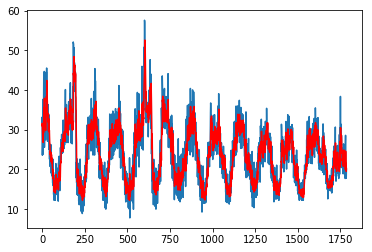

In [10]:
# 使用真实值进行单步预测，结果较为准确
from sklearn.metrics import mean_squared_error
X = series.values
size= int(len(X)*0.8)
trainx, testx = X[:size],X[size:]
history = [x for x in trainx]
predictions = list()
t1 = time.time()
for t in range(len(testx)):
    model = ARIMA(history, order = (5,1,0))
    model_fit= model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testx[t]
    history.append(obs)
    print('predicted = %f, expected = %f, time = %f'%(yhat, obs,(time.time() - t1)))
    
error =normalised_root_mean_square_error(testx, predictions)
print('test NRMSE:%.3F'%error)

plt.plot(testx)
plt.plot(predictions, color = 'red')

predicted = 25.639777, expected = 27.279854, time = 0.268388
predicted = 25.250442, expected = 28.589981, time = 0.510915
predicted = 25.405132, expected = 25.636884, time = 0.774014
predicted = 25.534493, expected = 22.850208, time = 1.012688
predicted = 25.213269, expected = 23.442557, time = 1.286323
predicted = 25.077429, expected = 18.956121, time = 1.633495
predicted = 25.258533, expected = 29.291961, time = 1.879350
predicted = 25.227187, expected = 22.111934, time = 2.110564
predicted = 25.228090, expected = 21.387652, time = 2.347137
predicted = 25.255828, expected = 24.304455, time = 2.600114
predicted = 25.206771, expected = 18.623278, time = 2.872961
predicted = 25.179396, expected = 18.623278, time = 3.149451
predicted = 25.191960, expected = 22.850208, time = 3.480229
predicted = 25.181674, expected = 19.860817, time = 3.718630
predicted = 25.173954, expected = 22.813914, time = 3.957442
predicted = 25.171964, expected = 23.255640, time = 4.215468
predicted = 25.159086, e

predicted = 24.203512, expected = 27.641092, time = 32.985744
predicted = 24.195351, expected = 22.509466, time = 33.229493
predicted = 24.187188, expected = 28.740605, time = 33.460855
predicted = 24.179028, expected = 30.991722, time = 33.706877
predicted = 24.170866, expected = 26.266276, time = 33.957050
predicted = 24.162703, expected = 27.612697, time = 34.214635
predicted = 24.154542, expected = 28.018128, time = 34.447159
predicted = 24.146378, expected = 20.099827, time = 34.678225
predicted = 24.138218, expected = 28.517393, time = 34.906219
predicted = 24.130057, expected = 28.922824, time = 35.154435
predicted = 24.121894, expected = 19.325259, time = 35.402352
predicted = 24.113731, expected = 23.436053, time = 35.652707
predicted = 24.105567, expected = 24.391446, time = 35.887912
predicted = 24.097408, expected = 20.635386, time = 36.115092
predicted = 24.089244, expected = 25.101325, time = 36.362523
predicted = 24.081081, expected = 28.046523, time = 36.602174
predicte

predicted = 23.117977, expected = 26.671707, time = 65.313926
predicted = 23.109817, expected = 37.795462, time = 65.553172
predicted = 23.101654, expected = 29.515173, time = 65.797970
predicted = 23.093493, expected = 33.113460, time = 66.051086
predicted = 23.085331, expected = 32.736424, time = 66.297346
predicted = 23.077170, expected = 31.665307, time = 66.551480
predicted = 23.069009, expected = 32.431976, time = 66.812792
predicted = 23.060844, expected = 36.058658, time = 67.058656
predicted = 23.052681, expected = 38.715206, time = 67.288888
predicted = 23.044520, expected = 33.388764, time = 67.530563
predicted = 23.036360, expected = 37.007547, time = 67.773013
predicted = 23.028198, expected = 25.803306, time = 68.016592
predicted = 23.020035, expected = 32.671735, time = 68.253158
predicted = 23.011872, expected = 33.149754, time = 68.491847
predicted = 23.003709, expected = 30.196657, time = 68.718531
predicted = 22.995550, expected = 32.505313, time = 68.966078
predicte

predicted = 22.032445, expected = 34.792724, time = 97.670741
predicted = 22.024287, expected = 27.576403, time = 97.924954
predicted = 22.016126, expected = 30.363079, time = 98.154393
predicted = 22.007959, expected = 35.494704, time = 98.397779
predicted = 21.999799, expected = 28.647520, time = 98.639526
predicted = 21.991638, expected = 30.971225, time = 98.913869
predicted = 21.983476, expected = 33.705809, time = 99.156446
predicted = 21.975312, expected = 29.422089, time = 99.386929
predicted = 21.967152, expected = 29.827520, time = 99.646937
predicted = 21.958989, expected = 33.308277, time = 99.874877
predicted = 21.950830, expected = 31.231480, time = 100.125198
predicted = 21.942668, expected = 33.446303, time = 100.375293
predicted = 21.934505, expected = 34.155433, time = 100.604975
predicted = 21.926342, expected = 29.089246, time = 100.849362
predicted = 21.918180, expected = 31.912215, time = 101.092773
predicted = 21.910019, expected = 30.992471, time = 101.331780
pr

predicted = 20.963249, expected = 29.855915, time = 130.774639
predicted = 20.955091, expected = 36.001119, time = 131.005103
predicted = 20.946929, expected = 32.273453, time = 131.254348
predicted = 20.938768, expected = 30.630483, time = 131.492301
predicted = 20.930603, expected = 32.034444, time = 131.769679
predicted = 20.922442, expected = 30.232951, time = 132.040838
predicted = 20.914280, expected = 33.227040, time = 132.276544
predicted = 20.906120, expected = 32.468270, time = 132.546039
predicted = 20.897958, expected = 25.860096, time = 132.796441
predicted = 20.889795, expected = 30.391474, time = 133.045830
predicted = 20.881632, expected = 29.697392, time = 133.284533
predicted = 20.873471, expected = 25.065031, time = 133.528969
predicted = 20.865308, expected = 30.666777, time = 133.774467
predicted = 20.857144, expected = 30.399373, time = 134.046826
predicted = 20.848982, expected = 25.831701, time = 134.290573
predicted = 20.840822, expected = 29.458383, time = 134

predicted = 19.894060, expected = 32.614196, time = 162.997520
predicted = 19.885897, expected = 33.214443, time = 163.251115
predicted = 19.877737, expected = 32.577901, time = 163.511645
predicted = 19.869577, expected = 26.375158, time = 163.763487
predicted = 19.861413, expected = 35.936430, time = 164.007887
predicted = 19.853251, expected = 30.804804, time = 164.252264
predicted = 19.845089, expected = 29.494677, time = 164.505116
predicted = 19.836927, expected = 34.423587, time = 164.746008
predicted = 19.828764, expected = 32.650490, time = 164.981785
predicted = 19.820604, expected = 26.208737, time = 165.214727
predicted = 19.812442, expected = 52.511307, time = 165.448778
predicted = 19.804280, expected = 37.579400, time = 165.705911
predicted = 19.796119, expected = 26.541580, time = 165.948128
predicted = 19.787955, expected = 33.113460, time = 166.187179
predicted = 19.779794, expected = 31.259875, time = 166.432694
predicted = 19.771633, expected = 28.647520, time = 166

predicted = 18.824876, expected = 27.373687, time = 195.581206
predicted = 18.816714, expected = 38.686811, time = 195.832960
predicted = 18.808553, expected = 42.768565, time = 196.065935
predicted = 18.800393, expected = 27.981834, time = 196.352726
predicted = 18.792228, expected = 30.363079, time = 196.608237
predicted = 18.784067, expected = 38.317674, time = 196.866600
predicted = 18.775904, expected = 33.721607, time = 197.152437
predicted = 18.767742, expected = 28.278383, time = 197.387476
predicted = 18.759581, expected = 39.851762, time = 197.620896
predicted = 18.751420, expected = 32.302598, time = 197.855514
predicted = 18.743258, expected = 31.528029, time = 198.123236
predicted = 18.735095, expected = 32.006049, time = 198.368099
predicted = 18.726934, expected = 37.267802, time = 198.629804
predicted = 18.718775, expected = 39.888056, time = 198.868793
predicted = 18.710611, expected = 37.115372, time = 199.123642
predicted = 18.702449, expected = 37.803361, time = 199

predicted = 17.755698, expected = 29.291961, time = 228.220158
predicted = 17.747537, expected = 30.602088, time = 228.479317
predicted = 17.739376, expected = 26.541580, time = 228.728027
predicted = 17.731213, expected = 36.305567, time = 228.979676
predicted = 17.723050, expected = 37.709527, time = 229.224321
predicted = 17.714890, expected = 26.852121, time = 229.481189
predicted = 17.706727, expected = 28.148256, time = 229.737866
predicted = 17.698565, expected = 31.267774, time = 229.990861
predicted = 17.690406, expected = 22.219759, time = 230.225504
predicted = 17.682244, expected = 29.183079, time = 230.460751
predicted = 17.674081, expected = 31.137647, time = 230.693260
predicted = 17.665918, expected = 26.121100, time = 230.937952
predicted = 17.657755, expected = 27.503815, time = 231.174636
predicted = 17.649590, expected = 27.648991, time = 231.410011
predicted = 17.641432, expected = 30.478157, time = 231.645571
predicted = 17.633270, expected = 23.276885, time = 231

predicted = 16.686512, expected = 17.776122, time = 262.235487
predicted = 16.678351, expected = 23.646022, time = 262.510006
predicted = 16.670192, expected = 24.992443, time = 262.749428
predicted = 16.662029, expected = 17.240563, time = 262.987810
predicted = 16.653868, expected = 22.611199, time = 263.241250
predicted = 16.645707, expected = 29.422089, time = 263.518970
predicted = 16.637545, expected = 21.576375, time = 263.774104
predicted = 16.629383, expected = 25.839600, time = 264.033142
predicted = 16.621221, expected = 29.161834, time = 264.287440
predicted = 16.613062, expected = 20.432670, time = 264.566701
predicted = 16.604897, expected = 29.494677, time = 264.830543
predicted = 16.596734, expected = 37.210263, time = 265.084471
predicted = 16.588575, expected = 25.897139, time = 265.351189
predicted = 16.580413, expected = 34.220872, time = 265.603689
predicted = 16.572251, expected = 42.283292, time = 265.852083
predicted = 16.564091, expected = 28.922824, time = 266

predicted = 15.617323, expected = 19.086249, time = 297.505710
predicted = 15.609164, expected = 13.310182, time = 297.767773
predicted = 15.600999, expected = 21.098356, time = 298.025197
predicted = 15.592838, expected = 18.753406, time = 298.266725
predicted = 15.584677, expected = 11.406957, time = 298.561641
predicted = 15.576518, expected = 18.051426, time = 298.912369
predicted = 15.568354, expected = 20.229954, time = 299.223678
predicted = 15.560191, expected = 12.311653, time = 299.509171
predicted = 15.552030, expected = 21.134650, time = 299.798924
predicted = 15.543869, expected = 21.503787, time = 300.053094
predicted = 15.535706, expected = 12.941045, time = 300.328650
predicted = 15.527546, expected = 21.633915, time = 300.610150
predicted = 15.519383, expected = 17.848710, time = 300.912237
predicted = 15.511219, expected = 14.859319, time = 301.162761
predicted = 15.503057, expected = 22.039346, time = 301.432685
predicted = 15.494898, expected = 19.122543, time = 301

predicted = 14.548119, expected = 15.864998, time = 333.963656
predicted = 14.539956, expected = 19.223526, time = 334.265212
predicted = 14.531793, expected = 13.658074, time = 334.530702
predicted = 14.523633, expected = 15.329439, time = 334.821491
predicted = 14.515469, expected = 17.008703, time = 335.121067
predicted = 14.507305, expected = 12.181526, time = 335.440793
predicted = 14.499144, expected = 16.270429, time = 335.720235
predicted = 14.490982, expected = 14.793881, time = 335.972856
predicted = 14.482820, expected = 12.550663, time = 336.224336
predicted = 14.474660, expected = 14.793881, time = 336.473770
predicted = 14.466496, expected = 18.485252, time = 336.753091
predicted = 14.458334, expected = 12.181526, time = 337.061759
predicted = 14.450175, expected = 16.270429, time = 337.343728
predicted = 14.442012, expected = 16.639566, time = 337.600593
predicted = 14.433849, expected = 14.396348, time = 337.898476
predicted = 14.425688, expected = 21.438349, time = 338

predicted = 13.478905, expected = 31.868022, time = 369.748549
predicted = 13.470743, expected = 34.922852, time = 370.014700
predicted = 13.462584, expected = 26.403553, time = 370.292846
predicted = 13.454422, expected = 17.877105, time = 370.550103
predicted = 13.446256, expected = 21.742797, time = 370.812034
predicted = 13.438096, expected = 17.479573, time = 371.102421
predicted = 13.429933, expected = 16.574877, time = 371.388612
predicted = 13.421771, expected = 18.051426, time = 371.643275
predicted = 13.413609, expected = 22.647493, time = 371.934313
predicted = 13.405447, expected = 13.650175, time = 372.210575
predicted = 13.397286, expected = 15.800309, time = 372.512966
predicted = 13.389123, expected = 19.361553, time = 372.770847
predicted = 13.380957, expected = 13.455358, time = 373.057361
predicted = 13.372797, expected = 21.576375, time = 373.356449
predicted = 13.364634, expected = 20.968229, time = 373.625293
predicted = 13.356473, expected = 14.823025, time = 373

predicted = 12.409695, expected = 24.456884, time = 405.435904
predicted = 12.401534, expected = 25.065031, time = 405.725713
predicted = 12.393373, expected = 32.614196, time = 405.991615
predicted = 12.385210, expected = 30.030236, time = 406.284338
predicted = 12.377048, expected = 23.783299, time = 406.552316
predicted = 12.368886, expected = 27.815413, time = 406.833017
predicted = 12.360724, expected = 22.683787, time = 407.090463
predicted = 12.352564, expected = 21.771192, time = 407.347715
predicted = 12.344401, expected = 17.848710, time = 407.614281
predicted = 12.336239, expected = 21.004523, time = 407.872745
predicted = 12.328077, expected = 17.645994, time = 408.119728
predicted = 12.319914, expected = 24.521574, time = 408.384637
predicted = 12.311753, expected = 26.736396, time = 408.652728
predicted = 12.303592, expected = 17.682289, time = 408.909583
predicted = 12.295429, expected = 22.039346, time = 409.168403
predicted = 12.287267, expected = 22.850208, time = 409

predicted = 11.340490, expected = 30.477408, time = 442.723681
predicted = 11.332330, expected = 34.082845, time = 442.999978
predicted = 11.324168, expected = 20.294644, time = 443.353919
predicted = 11.316008, expected = 28.074918, time = 443.671556
predicted = 11.307846, expected = 29.291961, time = 443.975610
predicted = 11.299684, expected = 29.045053, time = 444.235088
predicted = 11.291521, expected = 28.205046, time = 444.532232
predicted = 11.283359, expected = 29.450484, time = 444.837774
predicted = 11.275197, expected = 25.223554, time = 445.134485
predicted = 11.267036, expected = 27.482570, time = 445.425232
predicted = 11.258873, expected = 30.066530, time = 445.687939
predicted = 11.250711, expected = 21.742797, time = 445.998257
predicted = 11.242550, expected = 24.521574, time = 446.273473
predicted = 11.234388, expected = 26.200838, time = 446.563440
predicted = 11.226226, expected = 17.848710, time = 446.853592
predicted = 11.218065, expected = 20.968229, time = 447

predicted = 10.271285, expected = 35.145314, time = 481.004438
predicted = 10.263121, expected = 37.449272, time = 481.281988
predicted = 10.254959, expected = 39.489775, time = 481.563463
predicted = 10.246798, expected = 24.854417, time = 481.881285
predicted = 10.238635, expected = 30.768510, time = 482.177956
predicted = 10.230476, expected = 35.124818, time = 482.447321
predicted = 10.222312, expected = 35.733714, time = 482.755944
predicted = 10.214149, expected = 46.069554, time = 483.032156
predicted = 10.205988, expected = 50.738209, time = 483.333409
predicted = 10.197826, expected = 45.895233, time = 483.625757
predicted = 10.189663, expected = 45.903132, time = 483.911447
predicted = 10.181502, expected = 57.549099, time = 484.187678
predicted = 10.173341, expected = 57.107374, time = 484.454548
predicted = 10.165178, expected = 49.963641, time = 484.721416
predicted = 10.157016, expected = 50.571788, time = 485.034230
predicted = 10.148854, expected = 43.331770, time = 485

predicted = 9.193918, expected = 30.232951, time = 519.046127
predicted = 9.185757, expected = 36.341861, time = 519.344861
predicted = 9.177594, expected = 32.447774, time = 519.608051
predicted = 9.169430, expected = 31.173941, time = 519.874156
predicted = 9.161270, expected = 38.331666, time = 520.149880
predicted = 9.153110, expected = 33.019627, time = 520.433169
predicted = 9.144945, expected = 32.758315, time = 520.710639
predicted = 9.136784, expected = 31.506784, time = 520.975467
predicted = 9.128622, expected = 35.567293, time = 521.259542
predicted = 9.120459, expected = 32.411480, time = 521.546275
predicted = 9.112299, expected = 31.628263, time = 521.830247
predicted = 9.104138, expected = 36.297668, time = 522.092903
predicted = 9.095976, expected = 30.594189, time = 522.368545
predicted = 9.087813, expected = 28.951219, time = 522.629370
predicted = 9.079649, expected = 38.420800, time = 522.906484
predicted = 9.071487, expected = 31.340363, time = 523.168911
predicte

predicted = 8.108388, expected = 28.553687, time = 555.646592
predicted = 8.100222, expected = 30.768510, time = 555.913395
predicted = 8.092063, expected = 31.376657, time = 556.189074
predicted = 8.083901, expected = 30.602088, time = 556.478701
predicted = 8.075740, expected = 29.754932, time = 556.768391
predicted = 8.067578, expected = 24.753433, time = 557.060574
predicted = 8.059416, expected = 28.481099, time = 557.376894
predicted = 8.051253, expected = 36.370256, time = 557.692963
predicted = 8.043092, expected = 35.770008, time = 558.004565
predicted = 8.034929, expected = 33.222342, time = 558.265694
predicted = 8.026766, expected = 35.060129, time = 558.587275
predicted = 8.018603, expected = 26.279519, time = 558.915572
predicted = 8.010442, expected = 30.804804, time = 559.189572
predicted = 8.002281, expected = 33.888028, time = 559.471934
predicted = 7.994120, expected = 23.624777, time = 559.765313
predicted = 7.985954, expected = 40.366075, time = 560.027451
predicte

predicted = 7.022856, expected = 34.321855, time = 595.042491
predicted = 7.014695, expected = 36.710998, time = 595.313253
predicted = 7.006533, expected = 35.031734, time = 595.606998
predicted = 6.998371, expected = 30.855090, time = 595.901107
predicted = 6.990209, expected = 33.757901, time = 596.173668
predicted = 6.982048, expected = 33.721607, time = 596.447750
predicted = 6.973886, expected = 30.399373, time = 596.720779
predicted = 6.965723, expected = 28.537889, time = 596.992883
predicted = 6.957562, expected = 32.650490, time = 597.276091
predicted = 6.949400, expected = 23.385767, time = 597.562798
predicted = 6.941240, expected = 25.267747, time = 597.868455
predicted = 6.933076, expected = 26.375158, time = 598.183264
predicted = 6.924915, expected = 23.754904, time = 598.477926
predicted = 6.916753, expected = 22.481071, time = 598.788668
predicted = 6.908590, expected = 25.839600, time = 599.099851
predicted = 6.900428, expected = 27.207266, time = 599.361028
predicte

predicted = 5.937332, expected = 23.718610, time = 633.672470
predicted = 5.929171, expected = 23.791198, time = 633.979003
predicted = 5.921009, expected = 23.791198, time = 634.272540
predicted = 5.912847, expected = 29.125540, time = 634.578183
predicted = 5.904685, expected = 20.671680, time = 634.888243
predicted = 5.896521, expected = 25.803306, time = 635.195215
predicted = 5.888360, expected = 31.940610, time = 635.470747
predicted = 5.880198, expected = 25.434168, time = 635.746613
predicted = 5.872037, expected = 26.577874, time = 636.024307
predicted = 5.863874, expected = 32.078637, time = 636.312498
predicted = 5.855712, expected = 23.422061, time = 636.591264
predicted = 5.847553, expected = 24.695894, time = 636.878310
predicted = 5.839390, expected = 28.184550, time = 637.157318
predicted = 5.831225, expected = 28.959118, time = 637.451334
predicted = 5.823064, expected = 25.231453, time = 637.765590
predicted = 5.814903, expected = 28.922824, time = 638.064283
predicte

predicted = 4.851799, expected = 15.872897, time = 672.679962
predicted = 4.843638, expected = 12.919800, time = 672.992460
predicted = 4.835475, expected = 19.195131, time = 673.290081
predicted = 4.827312, expected = 17.718583, time = 673.576087
predicted = 4.819152, expected = 15.503760, time = 673.899917
predicted = 4.810989, expected = 21.040817, time = 674.218030
predicted = 4.802825, expected = 19.195131, time = 674.556510
predicted = 4.794664, expected = 13.455358, time = 674.894101
predicted = 4.786500, expected = 21.779091, time = 675.207947
predicted = 4.778340, expected = 18.456857, time = 675.520405
predicted = 4.770177, expected = 16.611171, time = 675.816573
predicted = 4.762015, expected = 21.207238, time = 676.109918
predicted = 4.753853, expected = 23.957620, time = 676.430803
predicted = 4.745692, expected = 23.146757, time = 676.715195
predicted = 4.737530, expected = 22.886502, time = 677.027279
predicted = 4.729368, expected = 25.803306, time = 677.338218
predicte

predicted = 3.766277, expected = 14.027211, time = 713.048136
predicted = 3.758115, expected = 13.455358, time = 713.365187
predicted = 3.749953, expected = 12.181526, time = 713.653138
predicted = 3.741793, expected = 16.574877, time = 713.936314
predicted = 3.733631, expected = 15.670181, time = 714.219500
predicted = 3.725468, expected = 16.574877, time = 714.518417
predicted = 3.717306, expected = 17.313151, time = 714.802152
predicted = 3.709145, expected = 17.515867, time = 715.086869
predicted = 3.700983, expected = 14.396348, time = 715.383168
predicted = 3.692822, expected = 17.515867, time = 715.671950
predicted = 3.684659, expected = 16.611171, time = 715.962943
predicted = 3.676498, expected = 16.611171, time = 716.254293
predicted = 3.668335, expected = 21.040817, time = 716.554370
predicted = 3.660174, expected = 19.325259, time = 716.842788
predicted = 3.652011, expected = 17.913399, time = 717.136066
predicted = 3.643850, expected = 26.577874, time = 717.421228
predicte

predicted = 2.680759, expected = 16.611171, time = 753.395799
predicted = 2.672597, expected = 12.347947, time = 753.737566
predicted = 2.664436, expected = 14.396348, time = 754.140394
predicted = 2.656275, expected = 13.455358, time = 754.467937
predicted = 2.648112, expected = 12.181526, time = 754.758742
predicted = 2.639952, expected = 14.396348, time = 755.064487
predicted = 2.631791, expected = 14.562770, time = 755.397364
predicted = 2.623628, expected = 12.550663, time = 755.711817
predicted = 2.615466, expected = 16.611171, time = 756.030547
predicted = 2.607304, expected = 12.550663, time = 756.388889
predicted = 2.599142, expected = 12.181526, time = 756.728352
predicted = 2.590980, expected = 17.349445, time = 757.052362
predicted = 2.582820, expected = 12.181526, time = 757.378222
predicted = 2.574658, expected = 13.658074, time = 757.731144
predicted = 2.566497, expected = 15.134623, time = 758.087116
predicted = 2.558335, expected = 15.163018, time = 758.450071
predicte

predicted = 1.595228, expected = 18.651673, time = 794.537236
predicted = 1.587069, expected = 28.054422, time = 794.809060
predicted = 1.578908, expected = 26.708001, time = 795.093910
predicted = 1.570745, expected = 23.588483, time = 795.399054
predicted = 1.562583, expected = 24.529473, time = 795.695907
predicted = 1.554424, expected = 23.399759, time = 795.973083
predicted = 1.546261, expected = 22.314650, time = 796.300458
predicted = 1.538100, expected = 23.197043, time = 796.588046
predicted = 1.529938, expected = 19.122543, time = 796.903426
predicted = 1.521776, expected = 23.602475, time = 797.245141
predicted = 1.513614, expected = 25.065031, time = 797.568473
predicted = 1.505450, expected = 21.576375, time = 797.876289
predicted = 1.497295, expected = 16.436851, time = 798.193173
predicted = 1.489130, expected = 19.730690, time = 798.494468
predicted = 1.480965, expected = 19.527974, time = 798.771408
predicted = 1.472804, expected = 17.479573, time = 799.071769
predicte

test MSE:0.642


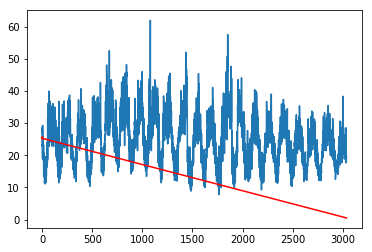

In [9]:
#使用预测值作为依据进行单步预测，结果有较大的偏离
from sklearn.metrics import mean_squared_error
X = series.values
size= int(len(X)*0.66)
trainx, testx = X[:size],X[size:]
history = [x for x in trainx]
predictions = list()
t1 = time.time()
for t in range(len(testx)):
    model = ARIMA(history, order = (5,1,0))
    model_fit= model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testx[t]
    history.append(yhat)
    print('predicted = %f, expected = %f, time = %f'%(yhat, obs,(time.time() - t1)))
    
error =normalised_root_mean_square_error(testx, predictions)
print('test MSE:%.3F'%error)

plt.plot(testx)
plt.plot(predictions, color = 'red')

由于无法进行多步预测，所以预测曲线会近乎平滑

predicted = 25.314326, expected = 27.279854
predicted = 26.149065, expected = 28.589981
predicted = 26.226800, expected = 25.636884
predicted = 26.438092, expected = 22.850208
predicted = 26.600986, expected = 23.442557
predicted = 26.953961, expected = 18.956121
predicted = 27.314437, expected = 29.291961
predicted = 27.573421, expected = 22.111934
predicted = 27.845199, expected = 21.387652
predicted = 28.113441, expected = 24.304455
predicted = 28.384610, expected = 18.623278
predicted = 28.659725, expected = 18.623278
predicted = 28.921639, expected = 22.850208
predicted = 29.179931, expected = 19.860817
predicted = 29.435658, expected = 22.813914
predicted = 29.687307, expected = 23.255640
predicted = 29.936073, expected = 13.455358
predicted = 30.180787, expected = 13.658074
predicted = 30.421677, expected = 20.838101
predicted = 30.659186, expected = 14.765485
predicted = 30.893279, expected = 16.980308
predicted = 31.123764, expected = 16.980308
predicted = 31.350852, expected 

predicted = 45.269717, expected = 16.611171
predicted = 45.289126, expected = 16.777593
predicted = 45.308421, expected = 21.373660
predicted = 45.327509, expected = 16.611171
predicted = 45.345896, expected = 17.515867
predicted = 45.364355, expected = 21.945513
predicted = 45.382532, expected = 16.611171
predicted = 45.400371, expected = 17.515867
predicted = 45.417755, expected = 26.006021
predicted = 45.435117, expected = 22.517365
predicted = 45.452071, expected = 21.373660
predicted = 45.468902, expected = 22.683787
predicted = 45.485468, expected = 16.372161
predicted = 45.501896, expected = 23.811694
predicted = 45.517876, expected = 30.427768
predicted = 45.533950, expected = 24.363051
predicted = 45.549468, expected = 21.849873
predicted = 45.564854, expected = 35.834286
predicted = 45.580002, expected = 25.969727
predicted = 45.594877, expected = 25.065031
predicted = 45.609576, expected = 33.352470
predicted = 45.624076, expected = 27.409982
predicted = 45.638328, expected 

predicted = 46.514576, expected = 31.021511
predicted = 46.515867, expected = 29.863814
predicted = 46.516887, expected = 22.075640
predicted = 46.517922, expected = 29.125540
predicted = 46.519292, expected = 28.387265
predicted = 46.520614, expected = 28.720109
predicted = 46.521570, expected = 30.399373
predicted = 46.522726, expected = 27.851707
predicted = 46.523841, expected = 27.004550
predicted = 46.524748, expected = 27.316148
predicted = 46.525848, expected = 28.437551
predicted = 46.526842, expected = 28.220844
predicted = 46.528044, expected = 29.515173
predicted = 46.528929, expected = 40.698918
predicted = 46.529951, expected = 23.422061
predicted = 46.530923, expected = 33.555185
predicted = 46.531848, expected = 31.557070
predicted = 46.532767, expected = 24.919106
predicted = 46.533792, expected = 29.588510
predicted = 46.534850, expected = 26.136149
predicted = 46.535700, expected = 30.826049
predicted = 46.536637, expected = 24.862316
predicted = 46.537854, expected 

predicted = 46.592958, expected = 31.332464
predicted = 46.593047, expected = 31.600618
predicted = 46.593052, expected = 25.361580
predicted = 46.593188, expected = 31.673206
predicted = 46.593265, expected = 35.993220
predicted = 46.593201, expected = 27.981834
predicted = 46.593374, expected = 35.125567
predicted = 46.593532, expected = 30.232951
predicted = 46.593477, expected = 29.125540
predicted = 46.593573, expected = 35.530999
predicted = 46.593538, expected = 31.267774
predicted = 46.593686, expected = 36.123347
predicted = 46.593789, expected = 31.195186
predicted = 46.593876, expected = 26.200838
predicted = 46.593883, expected = 28.582082
predicted = 46.593926, expected = 32.136176
predicted = 46.593964, expected = 25.636884
predicted = 46.594092, expected = 32.375186
predicted = 46.594243, expected = 36.066557
predicted = 46.594310, expected = 31.368758
predicted = 46.594116, expected = 28.111962
predicted = 46.594274, expected = 42.617192
predicted = 46.594429, expected 

predicted = 46.597825, expected = 27.446276
predicted = 46.597832, expected = 28.756403
predicted = 46.597658, expected = 17.146730
predicted = 46.597701, expected = 19.325259
predicted = 46.597900, expected = 21.576375
predicted = 46.597780, expected = 18.217847
predicted = 46.597877, expected = 18.217847
predicted = 46.597753, expected = 22.683787
predicted = 46.597985, expected = 17.848710
predicted = 46.597925, expected = 14.895613
predicted = 46.597712, expected = 21.576375
predicted = 46.597890, expected = 16.039318
predicted = 46.597852, expected = 18.586984
predicted = 46.597867, expected = 21.004523
predicted = 46.597901, expected = 16.242034
predicted = 46.597878, expected = 20.468964
predicted = 46.597943, expected = 23.791198
predicted = 46.597861, expected = 16.242034
predicted = 46.597645, expected = 18.420563
predicted = 46.597814, expected = 23.791198
predicted = 46.597719, expected = 18.825994
predicted = 46.597807, expected = 19.730690
predicted = 46.597727, expected 

predicted = 46.598081, expected = 27.503815
predicted = 46.598068, expected = 27.648991
predicted = 46.597927, expected = 30.478157
predicted = 46.598026, expected = 23.276885
predicted = 46.598124, expected = 26.063560
predicted = 46.598388, expected = 27.836658
predicted = 46.598155, expected = 24.680845
predicted = 46.598096, expected = 28.039374
predicted = 46.598188, expected = 25.730717
predicted = 46.598121, expected = 25.252698
predicted = 46.598176, expected = 27.706531
predicted = 46.598337, expected = 26.765541
predicted = 46.598132, expected = 24.623306
predicted = 46.598279, expected = 28.886530
predicted = 46.598268, expected = 27.647934
predicted = 46.597983, expected = 29.885059
predicted = 46.598276, expected = 27.670237
predicted = 46.598143, expected = 21.394905
predicted = 46.598146, expected = 26.323815
predicted = 46.598154, expected = 30.326785
predicted = 46.598165, expected = 29.276913
predicted = 46.598175, expected = 28.060619
predicted = 46.598138, expected 

predicted = 46.598346, expected = 35.827548
predicted = 46.598622, expected = 41.863869
predicted = 46.598482, expected = 43.470545
predicted = 46.598504, expected = 41.552271
predicted = 46.598467, expected = 42.363134
predicted = 46.598403, expected = 34.205823
predicted = 46.598450, expected = 34.500800
predicted = 46.598507, expected = 29.768924
predicted = 46.598488, expected = 38.208792
predicted = 46.598537, expected = 37.361635
predicted = 46.598446, expected = 41.754987
predicted = 46.598481, expected = 35.110519
predicted = 46.598466, expected = 39.352497
predicted = 46.598544, expected = 36.290518
predicted = 46.598461, expected = 33.149754
predicted = 46.598423, expected = 35.624832
predicted = 46.598485, expected = 30.637325
predicted = 46.598650, expected = 31.824578
predicted = 46.598470, expected = 34.133235
predicted = 46.598426, expected = 31.708443
predicted = 46.598363, expected = 39.077194
predicted = 46.598550, expected = 39.959587
predicted = 46.598689, expected 

predicted = 46.598459, expected = 18.513647
predicted = 46.598496, expected = 18.282536
predicted = 46.598370, expected = 18.615379
predicted = 46.598363, expected = 16.574877
predicted = 46.598386, expected = 16.639566
predicted = 46.598375, expected = 22.545760
predicted = 46.598381, expected = 16.777593
predicted = 46.598339, expected = 15.864998
predicted = 46.598333, expected = 19.223526
predicted = 46.598270, expected = 13.658074
predicted = 46.598388, expected = 15.329439
predicted = 46.598361, expected = 17.008703
predicted = 46.598502, expected = 12.181526
predicted = 46.598510, expected = 16.270429
predicted = 46.598471, expected = 14.793881
predicted = 46.598567, expected = 12.550663
predicted = 46.598579, expected = 14.793881
predicted = 46.598532, expected = 18.485252
predicted = 46.598480, expected = 12.181526
predicted = 46.598476, expected = 16.270429
predicted = 46.598470, expected = 16.639566
predicted = 46.598476, expected = 14.396348
predicted = 46.598511, expected 

predicted = 46.598444, expected = 13.086221
predicted = 46.598460, expected = 18.051426
predicted = 46.598534, expected = 12.883506
predicted = 46.598509, expected = 18.254141
predicted = 46.598485, expected = 17.885004
predicted = 46.598658, expected = 18.108216
predicted = 46.598587, expected = 17.718583
predicted = 46.598714, expected = 20.996624
predicted = 46.598657, expected = 17.349445
predicted = 46.598479, expected = 17.515867
predicted = 46.598601, expected = 23.450456
predicted = 46.598930, expected = 16.791584
predicted = 46.598759, expected = 20.099827
predicted = 46.598704, expected = 26.375158
predicted = 46.598767, expected = 17.515867
predicted = 46.598719, expected = 22.574905
predicted = 46.598744, expected = 24.992443
predicted = 46.598871, expected = 25.093015
predicted = 46.598833, expected = 24.254169
predicted = 46.598716, expected = 31.173941
predicted = 46.598716, expected = 27.779119
predicted = 46.598643, expected = 30.602088
predicted = 46.598660, expected 

predicted = 46.598230, expected = 30.232951
predicted = 46.598165, expected = 25.434168
predicted = 46.598271, expected = 34.459881
predicted = 46.598173, expected = 30.782502
predicted = 46.598271, expected = 26.172443
predicted = 46.598280, expected = 29.588510
predicted = 46.598240, expected = 31.520776
predicted = 46.598303, expected = 27.648991
predicted = 46.598336, expected = 32.042343
predicted = 46.598282, expected = 34.314705
predicted = 46.598251, expected = 25.231453
predicted = 46.598259, expected = 34.169425
predicted = 46.598293, expected = 31.759140
predicted = 46.598308, expected = 30.565794
predicted = 46.598233, expected = 26.302570
predicted = 46.598233, expected = 35.364577
predicted = 46.598319, expected = 28.914925
predicted = 46.598380, expected = 37.007547
predicted = 46.598197, expected = 41.096039
predicted = 46.598242, expected = 27.077138
predicted = 46.598253, expected = 33.482597
predicted = 46.598353, expected = 30.971225
predicted = 46.598217, expected 

predicted = 46.598143, expected = 35.437165
predicted = 46.598144, expected = 34.698891
predicted = 46.598328, expected = 35.603587
predicted = 46.598195, expected = 28.184550
predicted = 46.598397, expected = 30.971225
predicted = 46.598368, expected = 35.096423
predicted = 46.598244, expected = 38.353968
predicted = 46.598306, expected = 34.829018
predicted = 46.598362, expected = 39.960644
predicted = 46.598302, expected = 32.853205
predicted = 46.598216, expected = 37.094127
predicted = 46.598277, expected = 37.615694
predicted = 46.598394, expected = 33.388764
predicted = 46.598212, expected = 37.615694
predicted = 46.598279, expected = 47.624783
predicted = 46.598279, expected = 33.960617
predicted = 46.598337, expected = 32.484068
predicted = 46.598332, expected = 43.919420
predicted = 46.598355, expected = 30.283237
predicted = 46.598498, expected = 41.712496
predicted = 46.598439, expected = 43.927319
predicted = 46.598541, expected = 30.435667
predicted = 46.598489, expected 

predicted = 46.598561, expected = 15.134623
predicted = 46.598664, expected = 22.886502
predicted = 46.598679, expected = 11.812388
predicted = 46.598621, expected = 16.980308
predicted = 46.598651, expected = 22.886502
predicted = 46.598687, expected = 15.134623
predicted = 46.598727, expected = 18.087720
predicted = 46.598787, expected = 23.624777
predicted = 46.598717, expected = 12.550663
predicted = 46.598657, expected = 17.349445
predicted = 46.598683, expected = 22.148228
predicted = 46.598772, expected = 14.396348
predicted = 46.598773, expected = 18.623278
predicted = 46.598713, expected = 21.409954
predicted = 46.598710, expected = 15.872897
predicted = 46.598806, expected = 18.825994
predicted = 46.598753, expected = 23.993914
predicted = 46.598768, expected = 15.503760
predicted = 46.598705, expected = 24.732188
predicted = 46.598818, expected = 25.267747
predicted = 46.598809, expected = 12.919800
predicted = 46.598716, expected = 18.087720
predicted = 46.598697, expected 

predicted = 46.598757, expected = 30.399373
predicted = 46.598770, expected = 28.537889
predicted = 46.598765, expected = 32.650490
predicted = 46.598639, expected = 23.385767
predicted = 46.598646, expected = 25.267747
predicted = 46.598733, expected = 26.375158
predicted = 46.598655, expected = 23.754904
predicted = 46.598743, expected = 22.481071
predicted = 46.598766, expected = 25.839600
predicted = 46.598714, expected = 27.207266
predicted = 46.598783, expected = 28.198542
predicted = 46.598725, expected = 33.583169
predicted = 46.598838, expected = 23.588483
predicted = 46.598852, expected = 27.524957
predicted = 46.598937, expected = 28.184550
predicted = 46.598855, expected = 26.910717
predicted = 46.598811, expected = 26.541580
predicted = 46.598835, expected = 33.757901
predicted = 46.598921, expected = 33.721607
predicted = 46.598844, expected = 27.981834
predicted = 46.598907, expected = 29.370642
predicted = 46.598852, expected = 27.865699
predicted = 46.598768, expected 

predicted = 46.598709, expected = 28.184550
predicted = 46.598588, expected = 21.540081
predicted = 46.598614, expected = 28.184550
predicted = 46.598694, expected = 19.158837
predicted = 46.598657, expected = 21.170944
predicted = 46.598533, expected = 23.183052
predicted = 46.598624, expected = 18.420563
predicted = 46.598735, expected = 17.718583
predicted = 46.598628, expected = 20.468964
predicted = 46.598568, expected = 19.730690
predicted = 46.598646, expected = 17.146730
predicted = 46.598531, expected = 25.803306
predicted = 46.598614, expected = 22.517365
predicted = 46.598667, expected = 18.919827
predicted = 46.598643, expected = 21.207238
predicted = 46.598786, expected = 17.544262
predicted = 46.598708, expected = 16.777593
predicted = 46.598695, expected = 19.933405
predicted = 46.598725, expected = 17.515867
predicted = 46.598815, expected = 15.670181
predicted = 46.598829, expected = 15.872897
predicted = 46.598766, expected = 15.872897
predicted = 46.598735, expected 

predicted = 46.598506, expected = 14.396348
predicted = 46.598534, expected = 14.562770
predicted = 46.598745, expected = 12.550663
predicted = 46.598664, expected = 16.611171
predicted = 46.598683, expected = 12.550663
predicted = 46.598604, expected = 12.181526
predicted = 46.598482, expected = 17.349445
predicted = 46.598611, expected = 12.181526
predicted = 46.598619, expected = 13.658074
predicted = 46.598601, expected = 15.134623
predicted = 46.598787, expected = 15.163018
predicted = 46.598653, expected = 14.562770
predicted = 46.598620, expected = 19.195131
predicted = 46.598683, expected = 19.158837
predicted = 46.598544, expected = 19.195131
predicted = 46.598704, expected = 21.040817
predicted = 46.598649, expected = 19.564268
predicted = 46.598585, expected = 19.564268
predicted = 46.598660, expected = 19.418343
predicted = 46.598686, expected = 17.682289
predicted = 46.598599, expected = 19.730690
predicted = 46.598582, expected = 23.588483
predicted = 46.598599, expected 

predicted = 46.599097, expected = 25.839600
predicted = 46.599026, expected = 20.838101
predicted = 46.599104, expected = 22.581643
predicted = 46.599074, expected = 24.493179
predicted = 46.599065, expected = 21.373660
predicted = 46.599079, expected = 20.468964
predicted = 46.599019, expected = 21.945513
predicted = 46.599087, expected = 24.493179
predicted = 46.599044, expected = 30.638382
predicted = 46.599117, expected = 18.268133
predicted = 46.599006, expected = 20.302543
predicted = 46.599029, expected = 21.409954
predicted = 46.598905, expected = 17.008703
predicted = 46.598838, expected = 19.730690
predicted = 46.598884, expected = 22.886502
predicted = 46.598731, expected = 18.254141
predicted = 46.598866, expected = 22.075640
predicted = 46.598857, expected = 24.862316
predicted = 46.598728, expected = 23.450456
predicted = 46.598781, expected = 25.600590
predicted = 46.598787, expected = 26.006021
predicted = 46.598770, expected = 21.170944
predicted = 46.598790, expected 

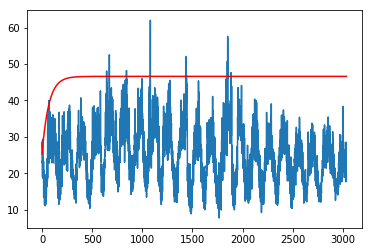

In [19]:
#使用预测值作为依据进行单步预测，结果有较大的偏离，不考虑差分的情况下，结果甚至退化为水平线
from sklearn.metrics import mean_squared_error
X = series.values
size= int(len(X)*0.66)
trainx, testx = X[:size],X[size:]
history = [x for x in trainx]
predictions = list()
for t in range(len(testx)):
    model = ARIMA(history, order = (5,0,0))
    model_fit= model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testx[t]
    history.append(yhat)
    print('predicted = %f, expected = %f'%(yhat, obs))
    
error = mean_squared_error(testx, predictions)
print('test MSE:%.3F'%error)

plt.plot(testx)
plt.plot(predictions, color = 'red')

In [26]:
np.sqrt(testx)

array([5.22301197, 5.34695998, 5.06328786, ..., 4.44103488, 4.21271618,
       4.46468424])

In [3]:
def normalised_root_mean_square_error(testx, predictions):
    #notice that testx is array while predictions is list of array
    #we should first convert list of array into array
    if type(predictions) == list:
        predictions = np.asarray(predictions).squeeze()
    assert type(predictions) == type(testx)
    assert predictions.shape == testx.shape
    meant = np.mean(testx)
    mse = np.mean(np.power(testx-predictions,2))
    rmse = np.sqrt(mse)
    nrmse = rmse/meant
    return nrmse

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
def score_model(data, cfg):
    gridNum,X = data
    result = None
    try:
        train_size = int(len(X)*0.8)
        trainx, testx = X[:train_size],X[train_size:]
        history = [x for x in trainx]
        #make prediction
        predictions = list()
        for t in range(len(testx)):
            model = ARIMA(history, order = cfg)
            model_fit = model.fit(disp = 0)
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(testx[t])
            #calculate out of sample error
        error = normalised_root_mean_square_error(testx, predictions)
    except:
        error = None
    #print(gridNum, error)
    return(gridNum, error)

In [6]:
def evaluate_arima_model(dataX,cfg,parallel = True, n_jobs = 32):
    samplenums = len(dataX)
    print('testing on configuration p = %d, d = %d, q = %d'%(cfg[0], cfg[1], cfg[2]))
    scores = None
    if parallel:
        executor = Parallel(n_jobs = n_jobs, backend = 'multiprocessing')
        tasks = (delayed(score_model)(data,cfg) for data in enumerate(dataX))
        scores = executor(tasks)
    else:
        scores = list()
        for data in enumerate(dataX):
            nrmse = score_model(data,cfg,stepahead)
            scores.append(data[0],nrmse)
    scores = [r for r in scores if r[1]!= None and not np.isnan(r[1])]
    #print(scores)
    nrmses = list(list(zip(*scores))[1])
    return np.mean(nrmses)

In [7]:
intervals = 144
daytest = 7
testlen = intervals*daytest
trainlen = data.shape[1] - testlen
dataTrain = data[:,:trainlen]

In [8]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,8)

In [14]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p,d,q)
                    nrmse = evaluate_arima_model(dataset, order)
                    if nrmse < best_score:
                        best_score, best_cfg = nrmse, order
                    print('ARIMA%s NRMSE = %.5f'%(order, nrmse))
                except:
                    continue
    print("Best ARIMA%s NRMSE = %5.f"%(best_cfg, best_score))

In [ ]:
evaluate_models(dataTrain, p_values, d_values, q_values)

testing on configuration p = 0, d = 0, q = 0
ARIMA(0, 0, 0) NRMSE = 13.51281
testing on configuration p = 0, d = 0, q = 1
ARIMA(0, 0, 1) NRMSE = 7.49797
testing on configuration p = 0, d = 0, q = 2
ARIMA(0, 0, 2) NRMSE = 4.98708
testing on configuration p = 0, d = 0, q = 3
ARIMA(0, 0, 3) NRMSE = 3.88037
testing on configuration p = 0, d = 0, q = 4
ARIMA(0, 0, 4) NRMSE = 3.14129
testing on configuration p = 0, d = 0, q = 5
ARIMA(0, 0, 5) NRMSE = 2.73942
testing on configuration p = 0, d = 0, q = 6
ARIMA(0, 0, 6) NRMSE = 2.40315
testing on configuration p = 0, d = 0, q = 7
ARIMA(0, 0, 7) NRMSE = 2.15910
testing on configuration p = 0, d = 1, q = 0
ARIMA(0, 1, 0) NRMSE = 0.14510
testing on configuration p = 0, d = 1, q = 1
ARIMA(0, 1, 1) NRMSE = 0.13907
testing on configuration p = 0, d = 1, q = 2
ARIMA(0, 1, 2) NRMSE = 0.13986
testing on configuration p = 0, d = 1, q = 3


In [ ]:
evaluate_models(dataTrain, [1,2,3,4,5,6,7], [1,2], [1,2,3])

### To do:
- 在所有格子找出最好的p d q组合
- 使用得到p d q组合对数据进行1、3、12、30预测
- 看看归一化对ARIMA模型是否有影响(#归了反而难以拟合数据）

## SARIMA

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
def sarima_forecast(history, config):
    order, sorder, trend = config
    #define model
    model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, enforce_stationary = False, enforce_invertibility = False)
    #fit model 
    model_fit = model.fit(disp = 0)
    #make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

In [50]:
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    #split dataset
    train_size = int(len(X)*0.8)
    trainx, testx = X[:train_size],X[train_size:]
    history = [x for x in trainx]
    for i in range(len(testx)):
        yhat = sarima_forecast(history, cfg)
        predictions.append(testx[i])
    error = normalised_root_mean_square_error(testx, predictions)
    return error

In [46]:
def score_model(data,n_test, cfg, debug = True):
    result = None
    #convert config to a key
    key = str(cfg)
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        try:
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    if result is not None:
        print('>Model[%s] %.3f'%(key, result))
    return (key, result)

In [38]:
from joblib import Parallel,delayed

In [21]:
executor = Parallel(n_jobs = 32, backend = 'multiprocessing')

In [22]:
tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)

NameError: name 'cfg_list' is not defined

In [ ]:
scores = executor(tasks)

In [40]:
def grid_search(data, cfg_list, n_test, parallel = True):
    score = None
    if parallel:
        #executor configs in parallel
        executor = Parallel(n_jobs = 32, backend = 'multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    scores = [r for r in scores if r[1]!= None]
    scores.sort(key = lambda tup:tup[1])
    return scores

In [26]:
def sarima_configs(seasonal = [0]):
    models = list()
    p_params = [0,1,2]
    d_params = [0,1]
    q_params = [0,1,2]
    t_params = ['n','c','t','ct']
    P_params = [0,1,2]
    D_params = [0,1]
    Q_params = [0,1,2]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q),(P,D,Q,m),t]
                                    models.append(cfg)
    return models

In [ ]:
cfg_list = sarima_configs()

In [ ]:
len(cfg_list)

In [ ]:
grid_search(X,cfg_list,5)